Machine Learning Nanodegree

Felipe Reis

# Definition

## Domain Background

Image recognition now is accessible to every programmer. The tools and libraries that are available implement complex algorithms and have easy to use APIs. I have a solid background as a web developer and today I feel I have the tools and knowledge at hand to tackle computer vision problems that I thought were exclusive for people with PhDs.

A good example of existent tool that can help us to solve computer vision problem is [OpenCV](http://opencv.org/). Using OpenCV with a combination of other Python libraries focused on data analysis, like [Pandas](http://pandas.pydata.org/) and [Numpy](http://www.numpy.org/), simplify our work a great deal.

Even though we have those great tools at reach, classifying images can still be very challenging. I believe the real difficulty lies on the fact that there a nearly infinite dataset to work with. The combination of elements that can be part of a certain image is incalculable, so we cannot have a learning data set that covers all possible images that we can think of.

There are many examples of machine learning being used to solve computer vision problems, and it's not hard to find applications that incorporated CIFAR-10 and CIFAR-100 as the dataset. One interesting instance of such project is a competition held by the website [Kaggle](https://www.kaggle.com/c/cifar-10). The goal of this competition was to create an algorithm that predicted a label for a given image. Another excellent example of algorithm that used the CIFAR-10 dataset is the [study performed by Rodrigo Benenson](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).

## Problem Statement
I am going to create a simple program that will read any given image and try to label the content of that image with one of the 10 labels defined by the CIFAR-10 dataset. [The CIFAR-10 dataset](Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.). In machine learning terms, this is a multi class classification problem.

## Evaluation Metrics
Since we are dealing with a perfectly balanced dataset (CIFAR-100 has 600 images labeled on each of its 100 lower level classes), I am going to propose using accuracy as the evaluation metric. 
My goal is to create a classifier that will have at least 80% accuracy on the trainning set, and at least 50% accuracy on sample images that have various dimensions and sizes.

All the while, the CNN classifier will have to perform better than a simple SVM classsifier.

# Analysis

## Data Exploration
This project uses the CIFAR 10 data set, which is composed of 60.000 32x32 pixels images classified as 10 different classes:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

A few sample images of this dataset are shown bellow

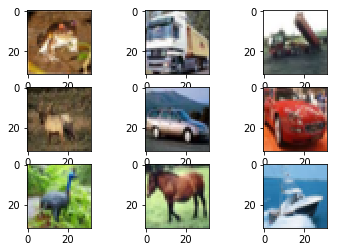

In [35]:
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
pyplot.show()

### Features

The features we're going to use are represented by each individual pixel in the images. Since we're dealing with images with 32 pixels in height and 32 pixels in width, we have a total of 1024 pixels.

The CNN classifier works with colored image, so there is a third dimension that has to be added to each pixel. This third dimension is an array with 3 elements, each one representing the Red, Blue and Green channel of the pixel. The RGB channel elements are integer numbers from 0 to 255. So, in the end, the CNN classifier will work with 3072 features.

The SVM classifier reduces the number of features by eliminating the color channel dimension. Before feeding the dataset into the classifier, our python code will convert each image to grayscale, as we'll see in a next step of this report.

### Labels
Each image in the dataset is associated with a label, which is an integer ranging from 0 to 9. This label is actually an index of the class description in a list that contains the 10 classes ordered alphabetically.
The code bellow prints the labels indexes and descriptions for the 9 images displayed above:



In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


for i in range(0, 9):
    print "Label index: %s. Label description: %s" % (y_train[i], classes[y_train[i][0]])

Label index: [6]. Label description: frog
Label index: [9]. Label description: truck
Label index: [9]. Label description: truck
Label index: [4]. Label description: deer
Label index: [1]. Label description: automobile
Label index: [1]. Label description: automobile
Label index: [2]. Label description: bird
Label index: [7]. Label description: horse
Label index: [8]. Label description: ship


### Label Distribution

The dataset is perfectly distributed among the 10 labels. There is exactly 6.000 images on each of the labels, resulting on the total of 60.000 images.


## Algorithms and Techniques

The main goal of this project is to build a Convolutional Neural Network (CNN) classifier to predict image labels. We'll be using the Keras library with a Tensor Flow backend to achieve our goal.

CNN classifiers are one of the best machine learning algorithms when it comes to image recognition. CNN works really well when the order of the features is important, and this is exactly the case with images. The numeric representation of the image pixels are our features, and the order of pixels is very significant.

That's why we've decided to use CNN. The decision to use Keras and Tensorflow followed suite, since this combination offers a great balance between simplicity and efficiency.

CNN works by applying a series of steps (or layers) on the data in a sequential manner. Each layer is composed by neurons that will filter or reduce the data. 

Convolution is a key layer of CNN. During the Convolution step, the algorithm will 'scan' the full image, comparing every little piece of the image with a set of known features. Each bit of data, or in our case each pixel, will be compared with the pixels from the features, generating a 'stack' for every feature. We can describe a stack as an array of weighted sums, where each item of the array is a pixel from the original image: 

<img src="images/convolution.png" style="max-width: 400px;"/>

In the picture above, the large square on the left side is the original image, representing the letter 'X'. The small square on the upper left corner is a feature, a diagonal line that represents a piece of the 'X', and the greenish square on the right is the stack generated when this features is applied to the original image.

This process runs many times, one for each of known feature.

After the Convolution layer is applied, we can execute Pooling. This layer will reduce the image a little bit, by creating smaller, aggregated sections of the stacks. Pooling will walk through the zones of the image and pick the highest scored pixel on that zone. This process helps the detection process to assimilate variances on the selected feature, like small differences in positioning and tilting:

<img src="images/pooling.png" style="max-width: 400px;"/>

The image above shows the original stack on the left, and the generated dataset after the Pooling step has done its job. As we can see, the image's dimension has reduced from 7x7 to 4x4.

We can use a special layer, provided by Keras, to reduce the risk of overfitting. The Dropout layer will randonly set a fraction of the inputs to 0. This will force the algorithm to apply the learning process again for those inputs.

There are other types of layers that can be applied to the network, and the same layer type can be at different parts of the network design. The choice of which layers to use, and their order, how many neurons to add to each layer are part of the art of building a CNN. More skilled engineers can even build custom layers, tailored specifically to the problem they're dealing.

The output of each layer becomes the input for the next. At first, each neuron from a given layer is connect to all the neurons from the next layer. This creates a complex network of connections, where each connecting line has a specific weight that controls the significance of that particular output to the next layer. One of the main jobs of the CNN algorithm, implemented by Keras, is to define those weights.

This is how a network would look like at first, before the trainning process starts:

<img src="images/cnn-start.png" style="max-width: 400px;"/>

The trainning process applies a somewhat simple technique to find the optimal weights for each neuron, called "Backpropagation". The algorithm will work with already labeled images (trainning set) and calculate the error rates for each prediction. Based on the error rate, new weights that reduce that rate will be define. 

After the trainning is complete, some neurons might have been given weights equals to 0. The output connection for those neurons are ignored, resulting on a simpler network:

<img src="images/cnn-finish.png" style="max-width: 400px;"/>

We'll also train a very simple Support Vector Machine (SVM) classifier that wil try to perform the same task - predict image labels - with the sole purpose of serving as a benchmark comparison to our primary CNN classifier.

## Benchmark Model
Our benchmark will be to provide better results than the Support Vector Machine (SVM) algorithm. The reason for this comparison is to compare the results given by a wide-scoped machine learning algorithm, like SVM, with the results generated by an algorithm that is more oriented to image recognition. 

We expect the CNN algorithm to have a much higher accuracy than the general algorithm. If this assumption is confirmed we can come to the conclusion that, when it comes to image recognition problems, we should give preference to algorithm that are more specialized in that domain.


## Evaluation Metrics
Since we are dealing with a perfectly balanced dataset (CIFAR-100 has 600 images labeled on each of its 100 lower level classes), we're going to use accuracy as the evaluation metric.


# Methodology

## CNN Classifier

### Data preprocessing

Before feeding the dataset images into our Sequential Model, there is a minor preparation. We normalized the data, dividing the RGB values by the maximum value, 255. This results on decimal numbers from 0 to 1. 

We'll also need to perform some resizing and scaling during the prediction phase. That preparation is needed, since the trainning set was composed by 32x32 images, and the sample images can have various dimensions.

### Implementation
We're using Keras' Sequential Model. This model allow us to use many processing layers that run sequentially and improve the accuracy of the classifier on each iteration, or epoch.

In our case we've implemented a pattern using the following steps: Convolution2D, Dropout, Convolution2D and MaxPooling2D. Then we repeated this pattern 3 times, increasing the number of feature maps from 32 to 64 and, finally, to 128.

This execution of layers is applied 25 times:


In [ ]:
# Attention: this block of code will train the classifier. This operation can take several hours to complete.

import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data 
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()
# First layer needs to define the input shape
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Iterates 25 times
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Uncomment the line bellow to run the trainning
# model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=64)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

model.save('classifiers/larger-cnn.h5')

### Trainning time

At this point I faced the first, and toughest, challenge of the assignment. The trainning simply takes too long to complete. I've made some test runs using lower values for 'epoch', and I could only manage to complete the trainning locally when defining value 1. This resulted on a much lower accuracy than I was expecting (around 40%). 

So I decided to run the algorithm on a more powerful machine and resorted to Amazon Web Service for that matter. I've 
rented a c3.large EC2 instance and ran the code with epoch equals 25. It took me quite some time to configure the machine with the Keras and Tensorflow environment. But in the end I've managed to build Tensorflow from source on the EC2 instance, and ran the code successfully.

After 5 hours or so the execution was completed, so I persisted the trained classifier to disk using the save() function from Keras. This process created a 20MB file with the .h5 extension that I uploaded to a public S3 bucket. From my local machine I could then download the persisted classifier and continue the experimentations.

That's why we won't see a complete output for the cell above in this iPython notebook. The result, however, was a classifier with around 80% accuracy, which is still not up to production standards, but suitable for this project.


### Predicition

The first step in the prediction process is to load the persisted classifier. After loading, we displayed the model summary just to assure that everything worked as expected:



In [36]:
from keras.models import load_model

model = load_model('./classifiers/larger-cnn.h5')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
__________

### Sample Image Preparation

We cannot expect that all images that will be sent to our classifier will have the exact same dimensions that our trainning images, which is 32x32 pixels. 

So we need to perform some preparation before sending the sample to the predict() function:

- Convert the image to a square. We achieve this by cropping the image right in the center. If we don't perform this crop we end up with a deformed, sometimes streched, version of the original image. The prediction will actually work with deformed images, but I found out that using cropped images resulted on better accuracies, at least with the sample images we'used
- Resize the squared image to a 32x32 tiny square
- Swap RGB channels. This was more of a trial-and-error discovery. The accuracy when running the predicion on the samples was terribly lower than the 80% we got on our test dataset, so I've tried different orders on the channels, and this is the one that worked the best

In [41]:
import cv2
import numpy as np

# Finds the coordinates on which to crop the image to form a perfect square
def cropCoordinates(image):
    height, width = image.shape[:2]

    new_size = min(height, width)
    cropped = None

    if new_size == height:
        start_row, start_col = int(0), int(0 + (width - new_size) / 2)

        end_row, end_col = int(height), int(width - (width - new_size) / 2)

        return (start_row, start_col, end_row, end_col)
    else:
        start_row, start_col = int(0 + (height - new_size) / 2), int(0)

        end_row, end_col = int(height - (height - new_size) / 2), int(width)

        return (start_row, start_col, end_row, end_col)

# Performs the crop
def crop(image):
    start_row, start_col, end_row, end_col = cropCoordinates(image)

    return image[start_row:end_row , start_col:end_col]

# Convert the image to a 32x32 pixels thumbnail
def convertTo32by32(image):
    cropped = crop(image)
    resized = cv2.resize(cropped, (32, 32), interpolation = cv2.INTER_AREA)

    return resized

# Swaps the RGB channels to adhere to Keras standards
def swapChannel(image):
    return np.swapaxes(np.swapaxes(image, 0, 2),1,2)

# 'Façade' function that conducts the whole image preparation process
def prepareImage(image, greyscale=False, preview=False):
    result = convertTo32by32(image)

    # This will be used when we work with the SVM classifier
    if greyscale:
        result = cv2.cvtColor(result, cv2.COLOR_BGRA2GRAY)

    # preview can be set to true for debugging purposes
    if preview:
        cv2.imshow("Preview", result)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        
    if not greyscale:
        result = swapChannel(result)    

    return result


Finally, our predictCNN() function. This function will prepare the image, normalize the data, and run the model.predict() function from Keras.

The result from the model.predict() function is a sized 10 array containing weights for each of the 10 possible classes. To find out which class is the chosen one we simply grab the index that contains the highest weight.

We can also calculate a precision value, by dividing the weight of the chosen class by the sum of all weights:

In [38]:
def predictCNN(image):    
    x = prepareImage(image, preview=False)
    
    x = x.astype('float32') 
    x = x / 255.0 
    x = np.expand_dims(x, axis=0)
    
    weighted_classes = list(model.predict(x, verbose=0)[0])
    pred = max(weighted_classes)
    
    precision = pred / sum(weighted_classes)
    
    return (classes[weighted_classes.index(pred)], precision)

Now, let's put our code to test using some sample images grabbed on the internet. The images contain different sizes and dimensions, so we can check if our data preparation is being effective.

<img src="images/airplane-01.jpg" style="max-width: 200px;">
<img src="images/bird-02.png" style="max-width: 200px;">
<img src="images/cat-03.jpg" style="max-width: 200px;">



In [42]:
print "---- Airplanes ----"
print predictCNN(cv2.imread('images/airplane-01.jpg'))
print predictCNN(cv2.imread('images/airplane-02.jpg'))
print predictCNN(cv2.imread('images/airplane-03.jpg'))

print "---- Automobiles ----"
print predictCNN(cv2.imread('images/automobile-01.jpg'))
print predictCNN(cv2.imread('images/automobile-02.jpg'))
print predictCNN(cv2.imread('images/automobile-03.jpg'))

print "---- Birds ----"
print predictCNN(cv2.imread('images/bird-01.jpg'))
print predictCNN(cv2.imread('images/bird-02.png'))
print predictCNN(cv2.imread('images/bird-03.jpg'))

print "---- Cats ----"
print predictCNN(cv2.imread('images/cat-01.jpg'))
print predictCNN(cv2.imread('images/cat-02.jpg'))
print predictCNN(cv2.imread('images/cat-03.jpg'))

print "---- Deers ----"
print predictCNN(cv2.imread('images/deer-01.jpg'))
print predictCNN(cv2.imread('images/deer-02.jpg'))
print predictCNN(cv2.imread('images/deer-03.jpg'))

print "---- Dogs ----"
print predictCNN(cv2.imread('images/dog-01.jpg'))
print predictCNN(cv2.imread('images/dog-02.jpg'))
print predictCNN(cv2.imread('images/dog-03.jpg'))

print "---- Frogs ----"
print predictCNN(cv2.imread('images/frog-01.jpg'))
print predictCNN(cv2.imread('images/frog-02.jpg'))
print predictCNN(cv2.imread('images/frog-03.jpg'))

print "---- Horses ----"
print predictCNN(cv2.imread('images/horse-01.jpg'))
print predictCNN(cv2.imread('images/horse-02.jpg'))
print predictCNN(cv2.imread('images/horse-03.jpg'))

print "---- Ships ----"
print predictCNN(cv2.imread('images/ship-01.jpg'))
print predictCNN(cv2.imread('images/ship-02.jpg'))
print predictCNN(cv2.imread('images/ship-03.jpg'))

print "---- Trucks ----"
print predictCNN(cv2.imread('images/truck-01.jpg'))
print predictCNN(cv2.imread('images/truck-02.jpg'))
print predictCNN(cv2.imread('images/truck-03.jpg'))


---- Airplanes ----
('airplane', 0.99978578820484643)
('airplane', 0.99999997787083617)
('airplane', 0.99999799802132305)
---- Automobiles ----
('automobile', 0.99999504135386508)
('automobile', 0.96686182620006944)
('automobile', 0.99989117853252396)
---- Birds ----
('bird', 0.99998036860612438)
('airplane', 0.72707449110952282)
('bird', 0.99984114316131267)
---- Cats ----
('cat', 0.96092851117593769)
('cat', 0.98011898653787266)
('cat', 0.96463835278110266)
---- Deers ----
('deer', 0.98758072425640064)
('deer', 0.9981710374422833)
('bird', 0.60071899639226489)
---- Dogs ----
('cat', 0.77759511110515767)
('dog', 0.57831404181058466)
('cat', 0.87355838424613552)
---- Frogs ----
('truck', 0.47710126938327874)
('automobile', 0.8800995811845379)
('automobile', 0.99985671153420963)
---- Horses ----
('airplane', 0.88880101316282689)
('airplane', 0.99923741391610488)
('dog', 0.3588241987109177)
---- Ships ----
('cat', 0.72194112218114881)
('ship', 0.9768867681037352)
('bird', 0.4018686523085

Our classifier guessed correctly on 18 out of 30 sample images, achieving a 60,00% accuracy. This is signficantly lower than the 80% accuracy we got on the test set. 

In many cases the classifier guessed the wrong label, it displayed a low precision value (sometimes .35 or .60). We could establish a lower bound and refrain from guessing if the precision was too low. For example, we could show a message like 'Sorry, the classifier cannot guess the label for this image', if the precision was lower than .90.


## SVM Classifier

The SVM classifier we've used on this project is purposely simple. Our focus was to build a strong CNN classifier and use SVM simply as a comparison tool. 

### Data preprocessing
In order to make the trainning faster, the images were converted to greyscale. That reduced the number of input feaures 3-fold.

Another preparation step was needed. Since the SVC.fit() function expects a 1-dimensional array, we had to flatten our 2x2 array before feeding it to the classifier:

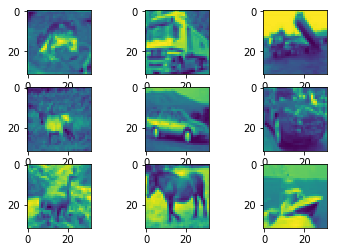

In [7]:
## Extract Dataset

from keras.datasets import cifar10
from keras import backend as K
K.set_image_data_format('channels_last')

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


## Convert images to grayscale

import cv2

X_train = map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGRA2GRAY), X_train)
X_test = map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGRA2GRAY), X_test)

# Display greyscale images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
pyplot.show()


*Quick note: The images may display a weird greenish tint on iPython Notebook, but they are actually greyscaled.*

### Implementation

The SVM implementation is very straighforward. We feed the classifier with our preprocessed images and call the fit() method

In [ ]:
# Attention: this block of code will train the classifier. This operation can take several hours to complete.

## Fit
from sklearn import svm
import numpy

clf = svm.SVC(gamma=0.001, C=100.)

# Flatten the feature array
X_train = numpy.array(X_train)
X_train = numpy.array(X_train).reshape((X_train.shape[0], -1), order='F')

y_train = numpy.array(y_train).flatten()

# Uncomment the line bellow to run the tranning
# clf.fit(X_train, y_train)

## Save classifier to disk
from sklearn.externals import joblib
joblib.dump(clf, 'clasifiers/svn-classifier.pkl')

### Trainning time

Trainning the SVM classifier also took a long time. Another EC2 c3.large instance was used and runned for 3-4 hours before the whole process was completed.

We could persist the trained model to disk using sklearn's dump() function. That generated a 400mb .pkl file that we can later load and avoid the trainning phase.

### Prediction

Firstly, let's load our trained model and assigned its value to the clf variable:

In [9]:
from sklearn.externals import joblib

clf = joblib.load('classifiers/svm-classifier.pkl')

clf

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The predictSVM() function is really simple. We can reuse the prepareImage() created in a previous step, being careful to specify that we want the generated image to be converted to greyscale.

After flattening the resulting array, we can pass the value to the predict() function:

In [11]:
def predictSVM(image):
    x = prepareImage(image, greyscale=True)
    
    x = np.array(x).flatten()
    
    pred = clf.predict([x])
    
    return classes[pred[0]]

Now, let's run the predictSVM() function on the same sample images used on the predictCNN() function:

In [12]:
print "---- Airplanes ----"
print predictSVM(cv2.imread('images/airplane-01.jpg'))
print predictSVM(cv2.imread('images/airplane-02.jpg'))
print predictSVM(cv2.imread('images/airplane-03.jpg'))

print "---- Automobiles ----"
print predictSVM(cv2.imread('images/automobile-01.jpg'))
print predictSVM(cv2.imread('images/automobile-02.jpg'))
print predictSVM(cv2.imread('images/automobile-03.jpg'))

print "---- Birds ----"
print predictSVM(cv2.imread('images/bird-01.jpg'))
print predictSVM(cv2.imread('images/bird-02.png'))
print predictSVM(cv2.imread('images/bird-03.jpg'))

print "---- Cats ----"
print predictSVM(cv2.imread('images/cat-01.jpg'))
print predictSVM(cv2.imread('images/cat-02.jpg'))
print predictSVM(cv2.imread('images/cat-03.jpg'))

print "---- Deers ----"
print predictSVM(cv2.imread('images/deer-01.jpg'))
print predictSVM(cv2.imread('images/deer-02.jpg'))
print predictSVM(cv2.imread('images/deer-03.jpg'))

print "---- Dogs ----"
print predictSVM(cv2.imread('images/dog-01.jpg'))
print predictSVM(cv2.imread('images/dog-02.jpg'))
print predictSVM(cv2.imread('images/dog-03.jpg'))

print "---- Frogs ----"
print predictSVM(cv2.imread('images/frog-01.jpg'))
print predictSVM(cv2.imread('images/frog-02.jpg'))
print predictSVM(cv2.imread('images/frog-03.jpg'))

print "---- Horses ----"
print predictSVM(cv2.imread('images/horse-01.jpg'))
print predictSVM(cv2.imread('images/horse-02.jpg'))
print predictSVM(cv2.imread('images/horse-03.jpg'))

print "---- Ships ----"
print predictSVM(cv2.imread('images/ship-01.jpg'))
print predictSVM(cv2.imread('images/ship-02.jpg'))
print predictSVM(cv2.imread('images/ship-03.jpg'))

print "---- Trucks ----"
print predictSVM(cv2.imread('images/truck-01.jpg'))
print predictSVM(cv2.imread('images/truck-02.jpg'))
print predictSVM(cv2.imread('images/truck-03.jpg'))


---- Airplanes ----
truck
truck
truck
---- Automobiles ----
truck
truck
truck
---- Birds ----
truck
truck
frog
---- Cats ----
truck
truck
truck
---- Deers ----
truck
truck
truck
---- Dogs ----
truck
truck
truck
---- Frogs ----
truck
truck
truck
---- Horses ----
truck
truck
truck
---- Ships ----
truck
truck
truck
---- Trucks ----
truck
truck
truck


Well, the results are not good at all. It looks like the SVM classifier labels every image with the same class: 'Truck'. This results on a 3 out of 30 correct guesses, or a 10% accuracy - after all, a broken clock shows the right time twice a day. Which is much lower than the 60% accuracy we had with CNN.

Also, with SVM we cannot derive a precision value, so we cannot say how 'confident' the classifier is with its prediction.


# Conclusion

The result of this project was not a surprise for me. 

Despite never having used Keras or Tensorflow before, I was expecting it to be much better than SVM, and any other Scikit-Learn algorithm for that matter. The reason for that is that all my previous researches showed that the Keras+Tensorflow combination was excellent for image classification.

Regarding SVM, we could obviously refine our classifier, perform feature sellection, cross-validation and many other enhancement in order to achieve better results. However, I doubt that we could get closer to the accuracy that CNN provides.

## Free-Form Visualization

### Accuracy by Class Comparison

Now, to have a more detailed look on the results we got from each algorithm, let's compare the correct guesses per class:

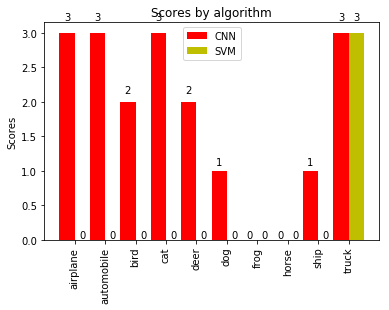

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
cnn_score = (3,3,2,3,2,1,0,0,1,3)

ind = np.arange(N)
width = .5

fig, ax = plt.subplots()
rects1 = ax.bar(ind, cnn_score, width, color='r')

svm_score = (0,0,0,0,0,0,0,0,0,3)

rects2 = ax.bar(ind + width, svm_score, width, color='y')

ax.set_ylabel('Scores')
ax.set_title('Scores by algorithm')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(classes, rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('CNN', 'SVM'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

By looking at the above chart, we can confirm that the CNN algorithm has a much better performance throughout most of the classes, even though it still needs some improvements on the 'frog' and 'horse' classes.

### Semantic Analysis vs Incorrect Guesses
As a final analysis, let's check how semantically similar our incorrect guesses are. 

First we'll use the NLTK corpus (based on [this article](http://dlacombejr.github.io/programming/2015/09/28/visualizing-cifar-10-categories-with-wordnet-and-networkx.html)) to inspect our labels for semantic proximity:


In [15]:
import nltk

# Shows the NLTK download GUI
# nltk.download()

import numpy as np
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic

N = len(classes)
similarity_matrix = np.zeros((N, N))
 
x_index = 0
y_index = 0

for category_x in classes:
    for category_y in classes:
        x = wn.synset(str(category_x) + str('.n.01')) 
        y = wn.synset(str(category_y) + str('.n.01')) 
        similarity_matrix[x_index, y_index] = x.path_similarity(y) 
        x_index += 1
        
    x_index = 0
    y_index += 1

similarity_matrix = similarity_matrix * abs(np.eye(10) - 1)

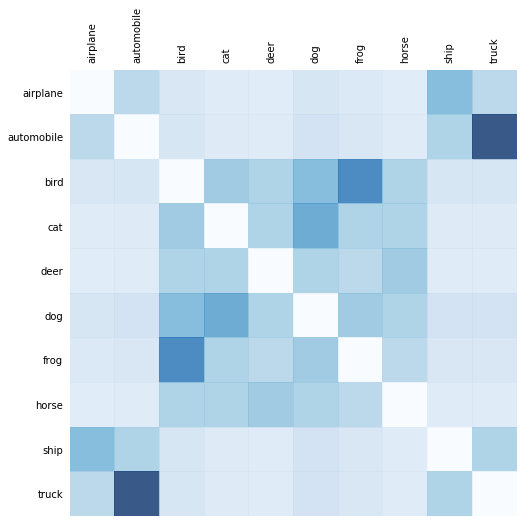

In [32]:
import matplotlib.pyplot as pl

# Displays a heatmap
def heatmap(data):
    fig, ax = pl.subplots()
    heatmap = ax.pcolor(data, cmap=pl.cm.Blues, alpha=0.8)

    fig = pl.gcf()
    fig.set_size_inches(8, 11)

    ax.set_frame_on(False)

    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(classes, minor=False)
    ax.set_yticklabels(classes, minor=False)

    pl.xticks(rotation=90)
    ax.grid(False)

    ax = pl.gca()
    ax.set_aspect('equal', adjustable='box')

    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    pl.show()
    
heatmap(similarity_matrix)    

The chart above shows strong similarities between truck and automobile, dog and cat, frog and bird, etc.

Now let's plot the wrong guesses on a heatmap similar to the one used to analyse the semantic similarities between classes.

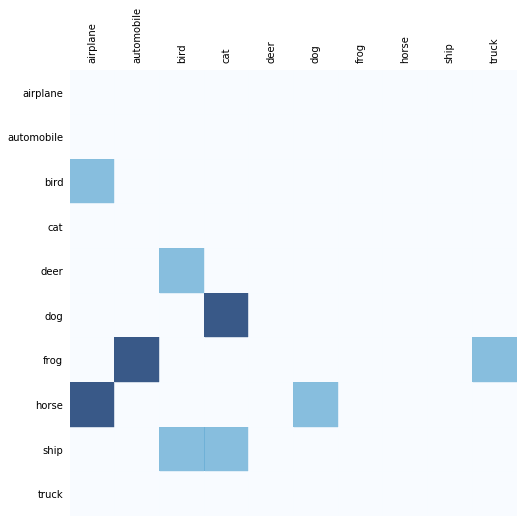

In [34]:
import matplotlib.pyplot as pl

misses = [
[0,0,0,0,0,0,0,0,0,0],   # Airplane
[0,0,0,0,0,0,0,0,0,0],   # Automobile
[1,0,0,0,0,0,0,0,0,0],   # Birds
[0,0,0,0,0,0,0,0,0,0],   # Cats
[0,0,1,0,0,0,0,0,0,0],   # Deers
[0,0,0,2,0,0,0,0,0,0],   # Dogs
[0,2,0,0,0,0,0,0,0,1],   # Frogs
[2,0,0,0,0,1,0,0,0,0],   # Horses
[0,0,1,1,0,0,0,0,0,0],   # Ships
[0,0,0,0,0,0,0,0,0,0]    # Trucks
]

heatmap(np.array(misses))

Most of the incorrect guesses associate the image with a class that is not semanticly close to the correct class. For example, we've associated 2 images of horses with the 'airplane' label, 2 images of frogs with the 'automobile' label, ships were associated with 'bird' and 'cat', etc. 

In my opinion this is totally understandable, since the semantic analysis takes into consideration only the words, and the meaning of the words, while the CNN algorithm we built looks at the visual features of the images.

## Reflections
This was a very challening project, because the scope of it was really wide and required a lot of research, study and practice. I have used a lot of concepts acquired during the course, but also had to learn new technologies and techniques. 

I particularly liked working with Convolutional Neural Networks. The concept of CNN is not a easy one to understand, however, Keras and Tensorflow help us a lot by creating a nice and easy to use API that shades the major complexities of CNN while still maintaining a high level of accuracy.

One of the most challenging parts of the project was to run the actual trainning algorithm, both for CNN and SVM. Since we're dealing with a somewhat large dataset (at least many times larger than any other dataset we've used throughout the course), the time my personal computer was taking to progress with the training was just too much to be practical. So I had to resort to a cloud platform to reduce the processing time. 

I believe this serves as an important lesson. Real-world problems that need machine learning systems to be solved often will have really large amounts of data to be handled. It is likely that a cloud platform will have to be used, since it is much cheaper than buying new hardware. My estimates are that, to run the Amazon EC2 instances that had to be used for this project, I've spent only 5 US Dollars.


## Possible Improvements
A technically simple but operationally difficult improvement would be to increase the number of epochs on the classifier. 

We would need to change just a line a code to update this value from 25 to 1.000, but this would translate to many extra hours of CPU time. Once complete, though, we could certainly hope for a much better accuracy than the 80% we got initially.